<a href="https://colab.research.google.com/github/Saurabh1729-coder/CORDIC-Processor/blob/main/Image_Compression_GreyScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets
import numpy
import matplotlib.pyplot

In [ ]:
# Encoder
x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=16, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 encoder_dense_1 (Dense)     (None, 300)               235500    
                                                                 
 encoder_leakyrelu_1 (LeakyR  (None, 300)              0         
 eLU)                                                            
                                                                 
 encoder_dense_2 (Dense)     (None, 16)                4816      
                                                                 
 encoder_output (LeakyReLU)  (None, 16)                0         
                                                                 
Total params: 240,316
Trainable params: 240,316
Non-trainable params: 0
_______________________________________________

In [ ]:
# Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(16), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 16)]              0         
                                                                 
 decoder_dense_1 (Dense)     (None, 300)               5100      
                                                                 
 decoder_leakyrelu_1 (LeakyR  (None, 300)              0         
 eLU)                                                            
                                                                 
 decoder_dense_2 (Dense)     (None, 784)               235984    
                                                                 
 decoder_output (LeakyReLU)  (None, 784)               0         
                                                                 
Total params: 241,084
Trainable params: 241,084
Non-trainable params: 0
_______________________________________________

In [ ]:
# Autoencoder
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AE_input (InputLayer)       [(None, 784)]             0         
                                                                 
 encoder_model (Functional)  (None, 16)                240316    
                                                                 
 decoder_model (Functional)  (None, 784)               241084    
                                                                 
Total params: 481,400
Trainable params: 481,400
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# RMSE
def rmse(y_true, y_predict):
    return tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict))

# AE Compilation
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Training AE
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))


Epoch 1/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0386 - val_loss: 0.0252
Epoch 2/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0239 - val_loss: 0.0223
Epoch 3/20
235/235 [==============================] - 6s 23ms/step - loss: 0.0218 - val_loss: 0.0206
Epoch 4/20
235/235 [==============================] - 5s 22ms/step - loss: 0.0204 - val_loss: 0.0194
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0193 - val_loss: 0.0185
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0185 - val_loss: 0.0179
Epoch 7/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0180 - val_loss: 0.0175
Epoch 8/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0175 - val_loss: 0.0171
Epoch 9/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0171 - val_loss: 0.0168
Epoch 10/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0168 - val_lo

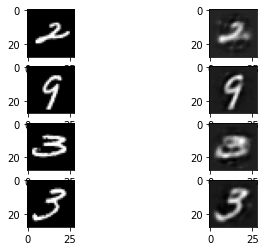

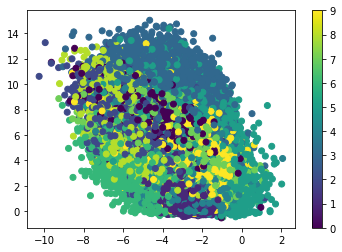

In [ ]:
num_images_to_show = 4
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)
matplotlib.pyplot.colorbar()